In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
'''
def dimension_2_random_walk(X):
    for U in range(1,5):
        U = np.random.randint(U) + 1
    
    if U == 1:
        X[0] += 1
    if U == 2:
        X[0] -= 1
    if U == 3:
        X[1] += 1
    if U == 4:
        X[1] += 1
        '''
        
def dimension_2_random_walk(X):
    U = np.random.random()
    if U > 0.5:
        if U > 0.75:
            X[0] += 1
        else:
            X[0] -= 1
    else:
        if U > 0.25:
            X[1] += 1
        else:
            X[1] -= 1

In [25]:
n = 80000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

nb_max_proportions = 10
dict_proportions = {}

while nbr_sections <= n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        longueurs.append(longueur)
        nbr_sections += 1
        longueur = 0
        if nbr_sections % 1000 == 0:
            dict_proportions[nbr_sections] = [longueurs.count(t)/nbr_sections for t in range(nb_max_proportions+1)]
    else:
        longueur += 1
    
    trajectoire.append(tuple(X))

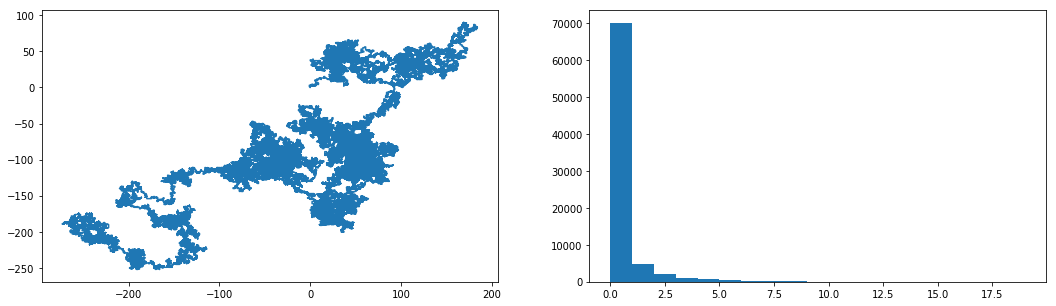

In [28]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()

In [30]:
import pandas as pd
proportions = pd.DataFrame(dict_proportions)
proportions

,1000,2000,3000,4000,5000,6000,7000,8000,9000,10000,...,71000,72000,73000,74000,75000,76000,77000,78000,79000,80000
0,0.797,0.8095,0.851333,0.85825,0.8632,0.853833,0.841571,0.834625,0.831333,0.8341,...,0.881521,0.880583,0.880068,0.880122,0.878893,0.877382,0.877195,0.876500,0.876494,0.875912
1,0.096,0.0860,0.070333,0.06625,0.0634,0.065500,0.072286,0.074875,0.076333,0.0757,...,0.058930,0.059250,0.059562,0.059473,0.059853,0.060513,0.060649,0.060987,0.061063,0.061250
2,0.050,0.0445,0.034667,0.03400,0.0312,0.032833,0.034429,0.035750,0.036778,0.0373,...,0.025986,0.026236,0.026438,0.026486,0.027040,0.027250,0.027377,0.027436,0.027443,0.027637
3,0.019,0.0230,0.016667,0.01575,0.0156,0.017667,0.019286,0.020125,0.020000,0.0191,...,0.012141,0.012292,0.012288,0.012270,0.012373,0.012658,0.012584,0.012705,0.012633,0.012762
4,0.010,0.0125,0.009333,0.00850,0.0084,0.010500,0.011714,0.012625,0.013000,0.0124,...,0.007901,0.007972,0.007986,0.007986,0.008040,0.008184,0.008195,0.008179,0.008190,0.008188
5,0.005,0.0070,0.005333,0.00475,0.0048,0.006167,0.006286,0.006750,0.006889,0.0065,...,0.004718,0.004722,0.004685,0.004689,0.004747,0.004789,0.004753,0.004769,0.004734,0.004750
6,0.010,0.0070,0.004667,0.00450,0.0042,0.004500,0.004429,0.005000,0.005444,0.0050,...,0.003183,0.003208,0.003192,0.003176,0.003227,0.003276,0.003247,0.003321,0.003342,0.003350
7,0.003,0.0035,0.003000,0.00350,0.0030,0.003000,0.003571,0.003500,0.003444,0.0035,...,0.001873,0.001931,0.001986,0.001973,0.002027,0.002079,0.002052,0.002064,0.002038,0.002087
8,0.004,0.0020,0.001333,0.00200,0.0028,0.002667,0.002857,0.002875,0.002889,0.0027,...,0.001437,0.001472,0.001493,0.001486,0.001467,0.001487,0.001506,0.001603,0.001620,0.001613
9,0.001,0.0010,0.000667,0.00050,0.0004,0.000500,0.000571,0.000625,0.000556,0.0006,...,0.000761,0.000764,0.000753,0.000784,0.000773,0.000803,0.000818,0.000821,0.000823,0.000838


Text(0.5,1,'Proportion de longueurs de taille 0 à 10 selon le nombre de longueurs total')

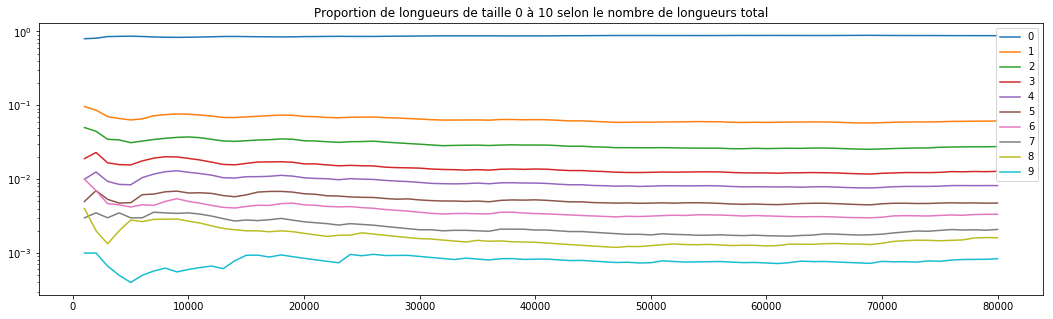

In [38]:
fig, ax = plt.subplots(figsize = (18,5))
for i in range(10):
    ax.plot(proportions.columns,proportions.loc[i,:], label=i)
plt.legend()
ax.set_yscale('log')
plt.title('Proportion de longueurs de taille 0 à 10 selon le nombre de longueurs total')

Cela donne l'impression d'une convergence… mais si l'on regarde de plus près, c'est plus discutable :

Text(0.5,1,'Proportion de longueurs de taille 0 selon le nombre de longueurs total')

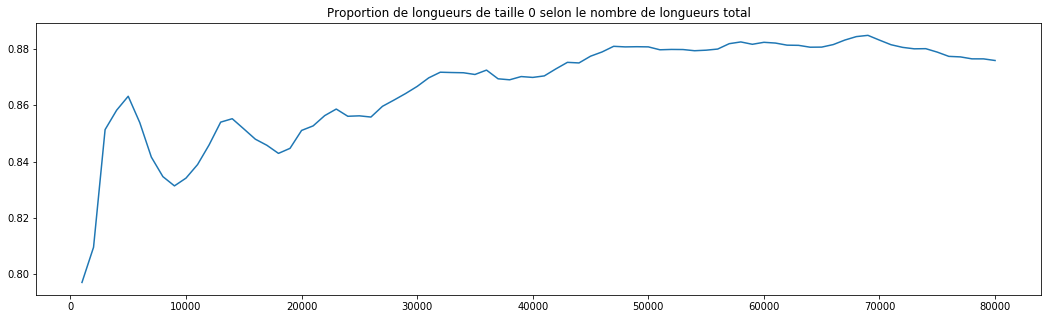

In [43]:
fig, ax = plt.subplots(figsize = (18,5))
n = 0
ax.plot(proportions.columns,proportions.loc[n,:], label=n)
plt.title('Proportion de longueurs de taille '+str(n)+' selon le nombre de longueurs total')

# Q2.

In [7]:

def liste_aleatoire(d,k):
    '''Fonction qui renvoie une liste composée de k 1, k 2, …, k (2d) dans
    un ordre aléatoire.'''
    liste_directions = []
    for i in range(2*d):
        liste_directions = liste_directions + k*[i+1]

    for t in range(2*d*k):
        '''On génère I aléatoire uniformément dans t, t+1, …, 12'''
        I = np.random.randint(t,2*d*k+1)
        a = liste_directions[t]
        liste_directions[t] = liste_directions[I-1]
        liste_directions[I-1] = a

    return liste_directions

In [8]:
''' Exemple '''
liste_aleatoire(2,3)

[2, 1, 3, 2, 1, 3, 4, 4, 4, 2, 1, 3]

In [17]:
11%2

1

In [36]:
d = 3
k = 3

n = 3000
X = [[0 for i in range(d)] for t in range(2*d*k)]
trajectoires = [[0 for i in range(d)] for t in range(2*d*k)]

longueurs = [[] for t in range(2*d*k)]
nbr_sections = [0 for t in range(2*d*k)]
longueur = [0 for t in range(2*d*k)]

while nbr_sections[0] < n:
    
    '''On calcule la liste aléatoire qui va définir le mouvement de chacune
    des 2*d*k trajectoires'''
    liste_alea = liste_aleatoire(d,k)
    
    for i in range(len(trajectoires)):
        
        
        X[i][((liste_alea[i]-1)//2)-1] += 2*((liste_alea[i] % 2) - 0.5)
    
        if tuple(X[i]) in trajectoires[i]:
            longueurs[i].append(longueur[i])
            nbr_sections[i] += 1
            longueur[i] = 0
        else:
            longueur[i] += 1
    
        trajectoires[i].append(tuple(X[i]))
    

In [37]:
X

[[25.0, -472.0, 548.0],
 [-54.0, 101.0, 626.0],
 [23.0, 28.0, -490.0],
 [-38.0, -132.0, -469.0],
 [119.0, 103.0, -531.0],
 [474.0, 150.0, 31.0],
 [481.0, -90.0, 26.0],
 [582.0, 101.0, 80.0],
 [-448.0, -44.0, 59.0],
 [-546.0, 72.0, 19.0],
 [-496.0, -2.0, 83.0],
 [1.0, 531.0, -63.0],
 [4.0, 601.0, -66.0],
 [65.0, 727.0, 25.0],
 [-6.0, -386.0, 125.0],
 [-36.0, -479.0, 16.0],
 [-35.0, -407.0, -75.0],
 [-115.0, -402.0, 56.0]]

In [38]:
trajectoires[1]

[0,
 0,
 0,
 (-1.0, 0, 0),
 (0.0, 0, 0),
 (0.0, 0, 1.0),
 (-1.0, 0, 1.0),
 (-1.0, -1.0, 1.0),
 (-1.0, -2.0, 1.0),
 (-1.0, -2.0, 2.0),
 (-1.0, -2.0, 1.0),
 (0.0, -2.0, 1.0),
 (1.0, -2.0, 1.0),
 (1.0, -3.0, 1.0),
 (1.0, -3.0, 2.0),
 (1.0, -4.0, 2.0),
 (1.0, -4.0, 3.0),
 (2.0, -4.0, 3.0),
 (3.0, -4.0, 3.0),
 (2.0, -4.0, 3.0),
 (2.0, -3.0, 3.0),
 (2.0, -3.0, 4.0),
 (2.0, -3.0, 5.0),
 (2.0, -2.0, 5.0),
 (2.0, -3.0, 5.0),
 (2.0, -4.0, 5.0),
 (1.0, -4.0, 5.0),
 (1.0, -5.0, 5.0),
 (1.0, -4.0, 5.0),
 (1.0, -4.0, 4.0),
 (1.0, -5.0, 4.0),
 (2.0, -5.0, 4.0),
 (2.0, -5.0, 3.0),
 (3.0, -5.0, 3.0),
 (3.0, -6.0, 3.0),
 (3.0, -7.0, 3.0),
 (3.0, -8.0, 3.0),
 (4.0, -8.0, 3.0),
 (4.0, -7.0, 3.0),
 (4.0, -7.0, 4.0),
 (5.0, -7.0, 4.0),
 (6.0, -7.0, 4.0),
 (6.0, -7.0, 5.0),
 (6.0, -7.0, 6.0),
 (7.0, -7.0, 6.0),
 (7.0, -7.0, 5.0),
 (7.0, -8.0, 5.0),
 (6.0, -8.0, 5.0),
 (5.0, -8.0, 5.0),
 (5.0, -9.0, 5.0),
 (5.0, -9.0, 6.0),
 (6.0, -9.0, 6.0),
 (6.0, -9.0, 5.0),
 (6.0, -9.0, 6.0),
 (6.0, -9.0, 7.0),
 (6.0, -9.

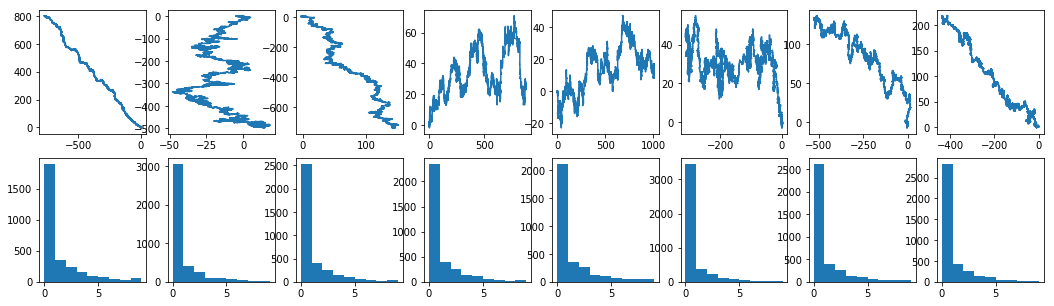

In [93]:
# Tracé des graphes pour k = d = 2

fig, (ax1,ax2) = plt.subplots(2,8,figsize = (18,5))

for t in range(8):
    x = list()
    y = list()

    for i in range(len(trajectoires[0])):
        x.append(trajectoires[t][i][0])
        y.append(trajectoires[t][i][1])

    ax1[t].plot(x,y)
    ax2[t].hist(longueurs[t],bins=range(10))
plt.show()

# Q3.

In [143]:
''' Idée : on code une marche aléatoire à peu près comme la premiere. Seulement, quand on arrive à une
longueur égale à une longueur définie, on va la continuer de n façons différentes, chacune de ces nouvelles
trajectoires s'arrêtant dès qu'il y a un croisement.'''

import copy

seuil = 7
n_rep = 10

n = 2000
X = [0,0]
trajectoire = []
trajectoire.append(tuple(X))
longueurs = []
nbr_sections = 0
longueur = 0

while nbr_sections < n:
    
    dimension_2_random_walk(X)
    
    if tuple(X) in trajectoire:
        trajectoire.append(tuple(X))
        longueur = 0
    else:
        trajectoire.append(tuple(X))
        longueur += 1
        
        if longueur == seuil:
            position_init = copy.deepcopy(X)
            i = 0
            nouv_trajectoires = [[] for t in range(n_rep)]
            while i < n_rep :
                
                dimension_2_random_walk(X)
                
                if tuple(X) in trajectoire + nouv_trajectoires[i]:
                    longueurs.append(longueur)
                    nbr_sections += 1
                    i += 1
                    X = copy.deepcopy(position_init)
                    longueur = seuil
                        
                else:
                    nouv_trajectoires[i].append(tuple(X))
                    longueur += 1
    

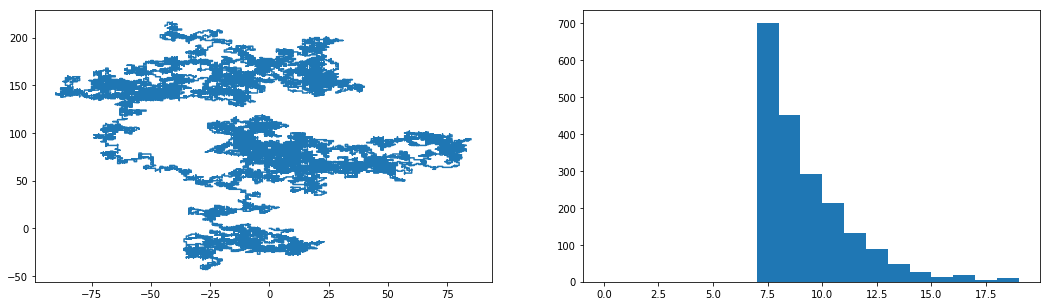

In [144]:
x = list()
y = list()

for i in range(len(trajectoire)):
    x.append(trajectoire[i][0])
    y.append(trajectoire[i][1])

fig, (ax1,ax2) = plt.subplots(1,2,figsize = (18,5))
ax1.plot(x,y)
ax2.hist(longueurs,bins=range(20))
plt.show()